# Recycling Effectiveness in MA

### *Part 2: Clustering of Municipalities Based on Census Data*


In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
# all the census data from education to ethnic demographics and voter data

characteristics = pd.read_csv('data/combined_municipality_characteristics.csv', index_col='municipality')

In [3]:
characteristics.head(2)

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_black_aa_%,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh
municipality,,,,,,,,,,,,,,,,,,,,,
Sharon,3833,98.4,72.9,4443,4.5,144333,173768,0.0,2.0,2195,...,1.4,0.5,10.3,0.0,1.5,2.8,32,7,60,1.161119
Southbridge,11439,82.6,17.2,13614,8.8,51270,64448,16.7,20.7,7368,...,5.3,1.6,0.5,0.1,10.9,32.9,31,10,57,0.934264


In [4]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, Sharon to Yarmouth
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KEY_population_25_and_older     271 non-null    int64  
 1   edu_high_school_and_higher_%    271 non-null    float64
 2   edu_bachelors_and_higher_%      271 non-null    float64
 3   KEY_pop_16_+                    271 non-null    int64  
 4   unemployment_rate_%             271 non-null    float64
 5   median_household_income         271 non-null    int64  
 6   mean_household_income           271 non-null    int64  
 7   families_below_poverty_level_%  271 non-null    float64
 8   people_below_poverty_level_%    271 non-null    float64
 9   KEY_total_housing_units         271 non-null    int64  
 10  occupancy_%                     271 non-null    float64
 11  1-unit_detached_%               271 non-null    float64
 12  1-unit_attached_%              

In [5]:
characteristics[~(characteristics >= 0).all(1)].T

municipality,Deerfield,Westminster,Lanesborough,Wareham,Leicester
KEY_population_25_and_older,3.110000e+02,5620.0,1834.0,7601.0,4519.0
edu_high_school_and_higher_%,9.840000e+01,95.7,94.3,92.6,91.3
edu_bachelors_and_higher_%,7.460000e+01,40.4,39.9,28.7,29.4
KEY_pop_16_+,5.390000e+02,6237.0,2004.0,8456.0,5671.0
unemployment_rate_%,8.100000e+00,4.6,8.1,4.5,3.7
median_household_income,-6.666667e+08,100972.0,67625.0,63805.0,81042.0
mean_household_income,9.096300e+04,118373.0,80318.0,78138.0,95204.0
families_below_poverty_level_%,0.000000e+00,1.0,2.6,8.2,5.8
people_below_poverty_level_%,3.890000e+01,2.6,8.1,11.7,8.1
KEY_total_housing_units,1.550000e+02,3080.0,1558.0,5467.0,2542.0


Clustering will not work with the NaN values in the four municipalities with no total_waste/hh information. Unfortunately, these locations did not have any trash data recorded, so I couldn't get an accurate picture of how much waste they generate. I think I'll try imputing these values as it is only four towns. I'll remove these four from the dataset if their imputations prove to be a problem.

The one thing I definitely need to fix right away is the median household income for Deerfield. I think in the census data, if they are missing information, they input a very large negative number. So it's artificially messing up my stats. I'm going to apply the mean household income for Deerfield to it's median income, as this is the best approximation that I have. It is a small town so hopefully the median wouldn't be too far from the mean.

In [6]:
characteristics.at['Deerfield', 'median_household_income',] = characteristics.loc['Deerfield']['mean_household_income']
characteristics.loc['Deerfield']['median_household_income']

90963.0

In [7]:
from sklearn.impute import KNNImputer

In [8]:
to_impute = characteristics[~(characteristics >= 0).all(1)].index

In [9]:
knni = KNNImputer()
characteristics_im = characteristics.copy()
characteristics_im.loc[:,:] = knni.fit_transform(characteristics)

In [10]:
characteristics_im.loc[to_impute]

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_black_aa_%,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh
municipality,,,,,,,,,,,,,,,,,,,,,
Westminster,5620.0,95.7,40.4,6237.0,4.6,100972.0,118373.0,1.0,2.6,3080.0,...,0.0,0.0,0.5,0.0,0.0,3.3,17.0,15.0,65.0,0.918887
Lanesborough,1834.0,94.3,39.9,2004.0,8.1,67625.0,80318.0,2.6,8.1,1558.0,...,2.3,0.3,0.2,0.0,0.7,0.8,26.0,10.0,62.0,0.702077
Wareham,7601.0,92.6,28.7,8456.0,4.5,63805.0,78138.0,8.2,11.7,5467.0,...,8.4,3.1,1.3,0.8,5.2,4.1,23.0,12.0,63.0,0.861921
Leicester,4519.0,91.3,29.4,5671.0,3.7,81042.0,95204.0,5.8,8.1,2542.0,...,3.4,0.1,1.2,0.1,0.0,2.4,24.0,11.0,64.0,1.112992


I can't know for sure how well this fit but from my analysis in Part 1, these values for total_waste/hh all seem reasonable. I will check out these point when comparing them in their own clusters.

-----

## Clustering Trial

### kMeans Clustering

I'm going to start with a rough pass--with all of the features--using kMeans Clustering. I'll do a little evaluation of what each cluster looks like. However, after this trial, I will most likely get better results if I do some feature selection and data standardization.

In [11]:
# picking an n of 6 because I wouldn't want to  assess more than 6 clusters

kmeans = KMeans(n_clusters=6)
kmeans.fit(characteristics_im)

KMeans(n_clusters=6)

In [12]:
# checking out how well dispersed the labels are

pd.Series(kmeans.labels_).value_counts()

0    94
5    82
4    49
3    26
2    19
1     1
dtype: int64

In [13]:
characteristics_im['km_label'] = kmeans.labels_

## Feature Selection and Label Assessment with PCA

PCA is helpful for dimensional reduction and visualizating high-dimensional data in 2 or 3 dimensions. I'm going to run PCA on my dataset and plot the points over 3-dimensions and assess how the trial KMeans clustering faired.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# I believe PCA analysis requires scaling because the variance must be comparable across similar "units". I have real values and percents, so it is critical to scale.
## src: https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca#:~:text=2%20Answers&text=Normalization%20is%20important%20in%20PCA,have%20not%20normalized%20the%20data

ss = StandardScaler()
characteristics_scaled = ss.fit_transform(characteristics_im)

In [16]:
characteristics_scaled = pd.DataFrame(characteristics_scaled)
characteristics_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.322509,0.960391,1.599806,-0.312175,0.129208,1.533279,1.248797,-1.113316,-1.051607,-0.320604,...,-0.206101,0.988533,-0.475568,-0.163654,-0.321093,0.553817,-1.231068,0.039903,0.688941,0.628834
1,-0.089686,-2.333324,-1.569176,-0.084701,2.188943,-1.178905,-1.126269,2.853408,2.523617,-0.064900,...,0.540421,-0.737306,-0.038690,2.264370,3.295075,0.440886,-0.456410,-0.430262,-0.119326,1.100895


In [17]:
# just renaming my columns

characteristics_scaled.rename(columns=dict(zip(characteristics_scaled.columns,list(characteristics_im.columns))), inplace=True)
characteristics_scaled.head(2)

,KEY_population_25_and_older,edu_high_school_and_higher_%,edu_bachelors_and_higher_%,KEY_pop_16_+,unemployment_rate_%,median_household_income,mean_household_income,families_below_poverty_level_%,people_below_poverty_level_%,KEY_total_housing_units,...,demo_american_indian_%,demo_asian_%,demo_native_islander%,demo_other_Race_%,demo_hispanic_latino_%,dem%,rep%,un%,total_waste/hh,km_label
0,-0.322509,0.960391,1.599806,-0.312175,0.129208,1.533279,1.248797,-1.113316,-1.051607,-0.320604,...,-0.206101,0.988533,-0.475568,-0.163654,-0.321093,0.553817,-1.231068,0.039903,0.688941,0.628834
1,-0.089686,-2.333324,-1.569176,-0.084701,2.188943,-1.178905,-1.126269,2.853408,2.523617,-0.064900,...,0.540421,-0.737306,-0.038690,2.264370,3.295075,0.440886,-0.456410,-0.430262,-0.119326,1.100895


### Heatmap analysis to remove highly correlated data

I'm going to approach this culling of features iteratively as it can be difficult to view all the relationships in one graph in one go.

In [18]:
# getting rid of some obviously highly correlated data (like population above certain age groups, mean income) in additional to some categories with only very few data points (mobile homes and RVs)

cols_to_include = ['edu_high_school_and_higher_%',
 'edu_bachelors_and_higher_%',
 'unemployment_rate_%',
 'median_household_income',
 'people_below_poverty_level_%',
 'occupancy_%',
 '1-unit_detached_%',
 '1-unit_attached_%',
 '2-units_%',
 '3-4_units_%',
 '5-9_units_%',
 '10-19_units_%',
 '20+_units_%',
 'owner-occupied_%',
 'renter-occupied_%',
 'KEY_total_population',
 'median_age',
 'demo_white_%',
 'demo_black_aa_%',
 'demo_american_indian_%',
 'demo_asian_%',
 'demo_native_islander%',
 'demo_other_Race_%',
 'demo_hispanic_latino_%',
 'dem%',
 'rep%',
 'un%',
 'total_waste/hh']

In [19]:
import seaborn as sns

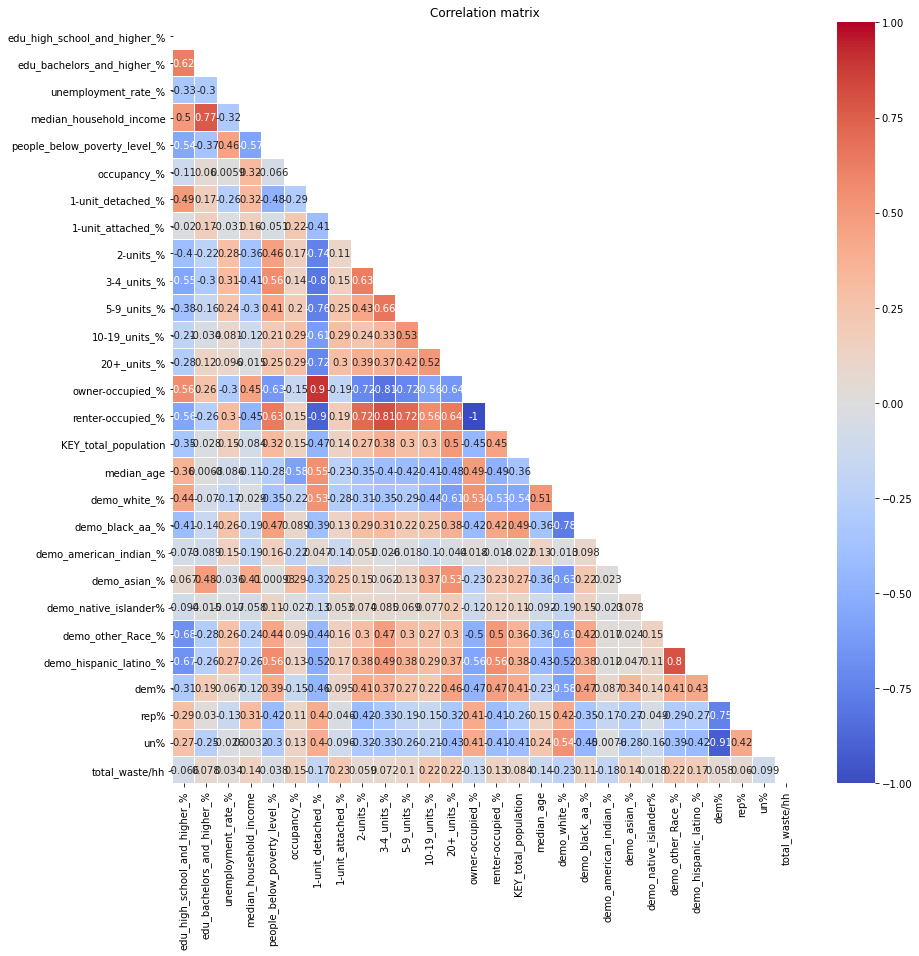

In [20]:
mask = np.zeros_like(characteristics_scaled[cols_to_include].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(
    characteristics_scaled[cols_to_include].corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Correlation matrix');

Highly correlated features to remove:
* `dem%` -- this is highly correlated with `rep%` and `un%`, which makes sense. Removing this feature should be fine because these other two features with conversely describe dem%.
* `demo_white_%` -- highly correlated with the other ethnic demographics. Again, I feel okay removing this because the other demographics should conversely describe the percentage of caucasians. 
* `demo_other_Race_%` -- Somewhat unexpected but this feature maps almost perfectly with `demo_hispanic_latino_%`. I very much do not understand why the census has a separate section about hispanic heritage outside of race, I'm guessing latino heritage is not considered a race, but the data matches it almost one for one. I admit, this is my cultural ignorance but I will follow the data in this case. I'm choosing to remove 'other race' over 'hispanic' because hispanic as slighly higher correlations in the other categories.
* `owner-occupied_%` -- It is _highly_ correlated with 1-unit_detached and is 1-for-1 with `renter-occupied_%`. This supports that `renter-occupied_%` should be able to account for owner occupancy conversely. 

In [21]:
# first-pass: heatmap correlation down-selection

cols_to_include = ['edu_high_school_and_higher_%',
 'edu_bachelors_and_higher_%',
 'unemployment_rate_%',
 'median_household_income',
 'people_below_poverty_level_%',
 'occupancy_%',
 '1-unit_detached_%',
 '1-unit_attached_%',
 '2-units_%',
 '3-4_units_%',
 '5-9_units_%',
 '10-19_units_%',
 '20+_units_%',
# 'owner-occupied_%',
 'renter-occupied_%',
 'KEY_total_population',
 'median_age',
# 'demo_white_%',
 'demo_black_aa_%',
 'demo_american_indian_%',
 'demo_asian_%',
 'demo_native_islander%',
# 'demo_other_Race_%',
 'demo_hispanic_latino_%',
# 'dem%',
 'rep%',
 'un%',
 'total_waste/hh']

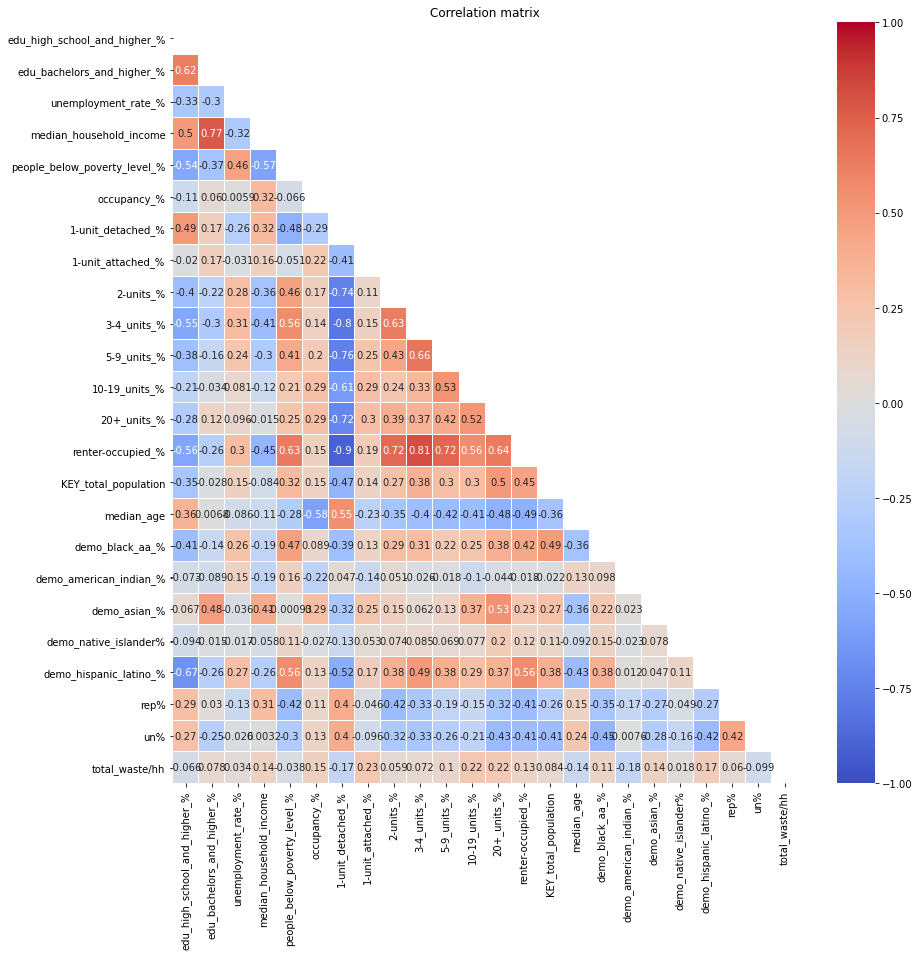

In [22]:
mask = np.zeros_like(characteristics_scaled[cols_to_include].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(
    characteristics_scaled[cols_to_include].corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Correlation matrix');

Additional highly correlated features to remove:
* `renter-occupied_%` & `1-unit_detached_%` -- I know I already removed `owner-occupied_%` but there is a lot of interplay between types of units and type of occupancy. I think this configuration will results in the least "double counting" through highly correlated features.
* `edu_bachelors_and_higher_%` -- I'm reluctant to remove this but it is highly correlated with median income.

In [23]:
# getting rid of some obviously highly correlated data (like population above certain age groups, mean income) in additional to some categories with only very few data points (mobile homes and RVs)

cols_to_include = ['edu_high_school_and_higher_%',
# 'edu_bachelors_and_higher_%',
 'unemployment_rate_%',
 'median_household_income',
 'people_below_poverty_level_%',
 'occupancy_%',
# '1-unit_detached_%',
 '1-unit_attached_%',
 '2-units_%',
 '3-4_units_%',
 '5-9_units_%',
 '10-19_units_%',
 '20+_units_%',
# 'owner-occupied_%',
# 'renter-occupied_%',
 'KEY_total_population',
 'median_age',
# 'demo_white_%',
 'demo_black_aa_%',
 'demo_american_indian_%',
 'demo_asian_%',
 'demo_native_islander%',
# 'demo_other_Race_%',
 'demo_hispanic_latino_%',
# 'dem%',
 'rep%',
 'un%',
 'total_waste/hh']

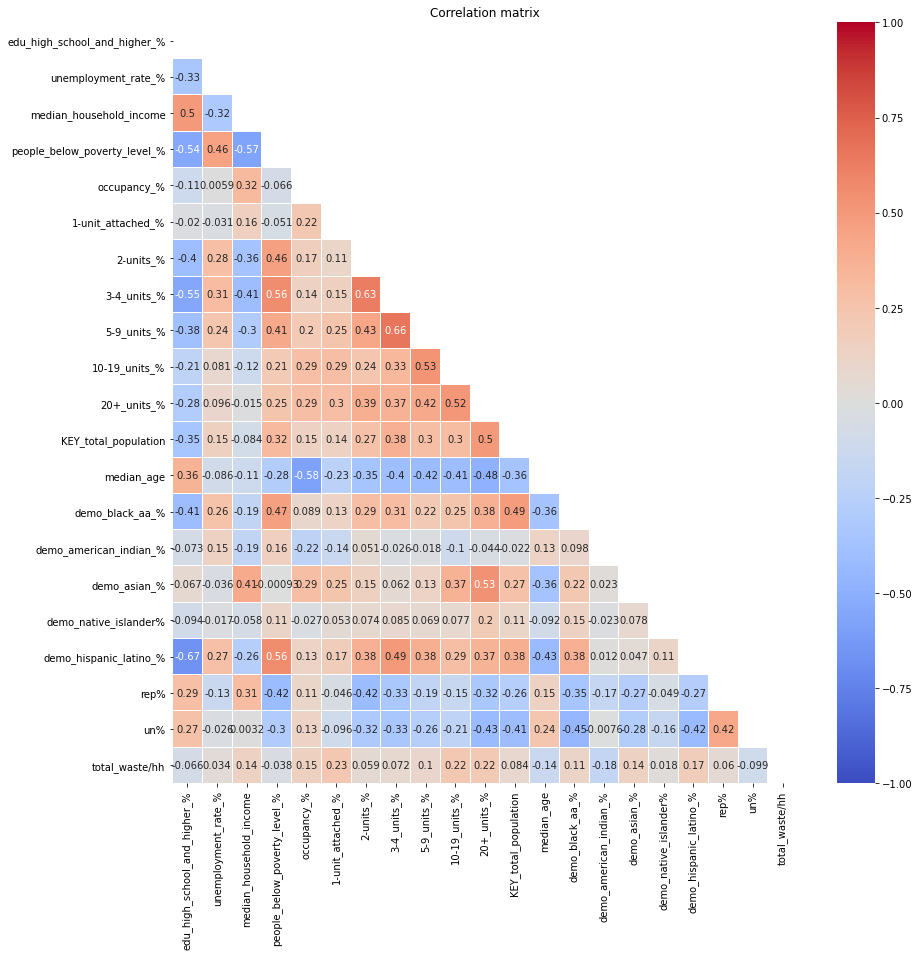

In [24]:
mask = np.zeros_like(characteristics_scaled[cols_to_include].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(
    characteristics_scaled[cols_to_include].corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)

plt.title('Correlation matrix');

Okay, there's nothign with over 75% correlation now. Because of the nature of the data, there is still a lot of high correlations but I think I've minimized it too an acceptable degree. So I'll proceed with the PCA.

In [25]:
low_corr_df = characteristics_scaled[cols_to_include]

In [26]:
# picking 6 components because I'd at most want 6 clusters, so I'm approaching the PCA as 1-for-1 feature-to-cluster

pca = PCA(n_components=6)
characteristics_pca = pca.fit_transform(low_corr_df)

In [27]:
pca.explained_variance_ratio_

array([0.28749244, 0.13515972, 0.07671563, 0.0544759 , 0.05173795,
       0.0470945 ])

Looks like the explained variance very quickly drops off. But the first five PCA-components (z1-z5), explain more than 5% of the variance which seems pretty good.

In [28]:
components = pd.DataFrame(pca.components_, columns=low_corr_df.columns, index=['z1', 'z2','z3','z4','z5','z6']).T
components.sort_values(by='z1', ascending=False)

,z1,z2,z3,z4,z5,z6
3-4_units_%,0.310284,0.104360,-0.195821,0.027738,0.185388,0.110308
demo_hispanic_latino_%,0.291330,0.069119,-0.084768,-0.247680,-0.223442,-0.066575
people_below_poverty_level_%,0.281568,0.278663,-0.011022,0.031903,-0.090075,-0.011616
20+_units_%,0.276820,-0.238649,0.156281,0.038356,0.113908,0.025997
5-9_units_%,0.275405,-0.018333,-0.255323,0.091252,0.360218,0.067149
2-units_%,0.273502,0.086785,-0.056677,0.193115,0.173396,0.087480
demo_black_aa_%,0.254428,0.016909,0.242968,-0.096338,-0.329270,-0.130490
KEY_total_population,0.249214,-0.081620,0.183728,-0.098991,-0.216340,0.012425
10-19_units_%,0.226190,-0.213248,-0.114261,0.056877,0.325954,-0.060203
unemployment_rate_%,0.156147,0.214944,-0.155475,0.171023,-0.210928,-0.361011


I'm impressed by the spread of feature importances in each component; z1 pulls from almost ever feature, with the lowest contributing feature being demo_american_indian_% (which I believe only accounded for 1.2% of the variation in z1). However, even this feature is used in z2. Perhaps this isn't that impressive, but the way I'm interpretting is that it didn't take until component z6 for theses features to become important.

In [29]:
# making a df of pca data for scatter plots

pca_df = pd.DataFrame(characteristics_pca)
pca_df.rename(columns=dict(zip(pca_df.columns,list(components.columns))), inplace=True)
pca_df.head(2)

,z1,z2,z3,z4,z5,z6
0,-1.281009,-1.501268,0.898595,0.786829,-0.69507,-0.522251
1,5.082644,2.831458,-2.310540,0.181587,-0.45738,-0.163865


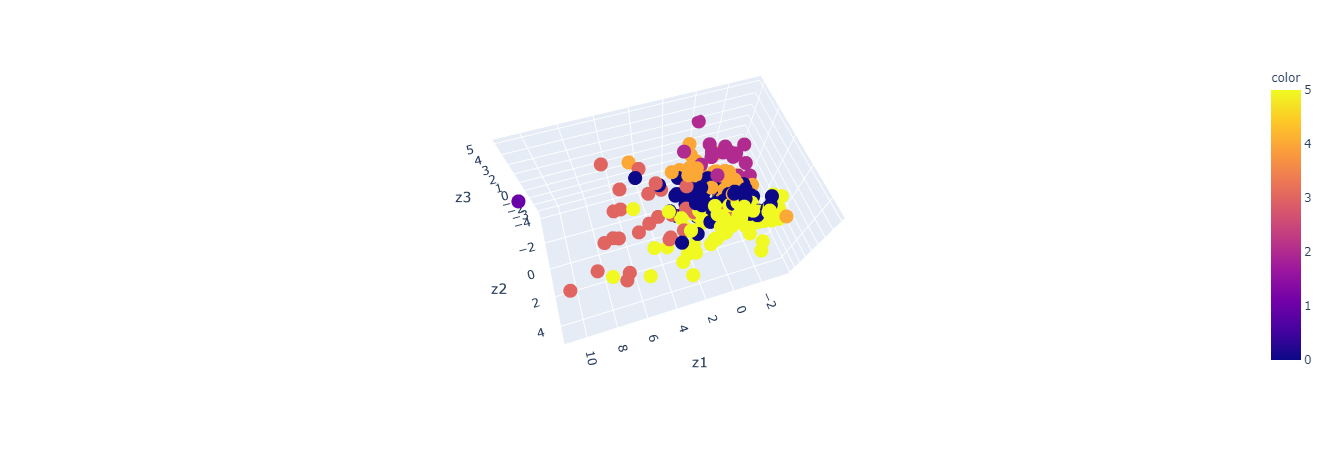

In [31]:
# this is just an interactive view that doesn't show up on static pages like GitHub.

import plotly.express as px

px.scatter_3d(pca_df, 'z1', 'z2', 'z3', color=characteristics_im['km_label'])

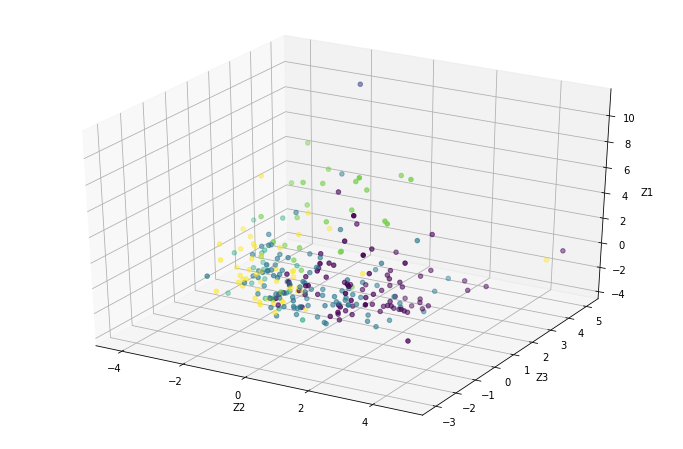

In [38]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['z2'], pca_df['z3'], pca_df['z1'], c= characteristics_im['km_label'])
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.set_zlabel('Z1')

plt.show()

So, I'm happy to see some clear clusters using the PCA axis (z1-z3). I'm going to re-run the kmeans clustering with the scaled data and the feature down selection, though, and see if these cluster distictions can get a little clearer.

In [39]:
kmeans2 = KMeans(n_clusters=6)
kmeans2.fit(characteristics_im[cols_to_include])

KMeans(n_clusters=6)

In [40]:
pd.Series(kmeans2.labels_).value_counts()

2    123
0     76
5     38
4     23
3     10
1      1
dtype: int64

In [42]:
characteristics_im['km_trimmed_label'] = kmeans2.labels_

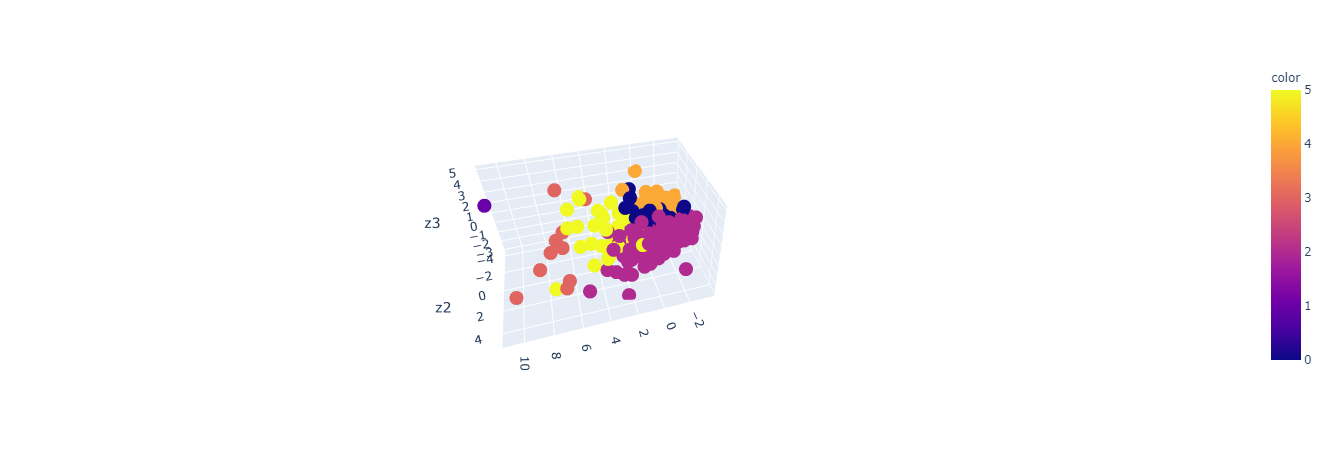

In [41]:
# interactive model

px.scatter_3d(pca_df, 'z1', 'z2', 'z3', color=characteristics_im['km_trimmed_label'])

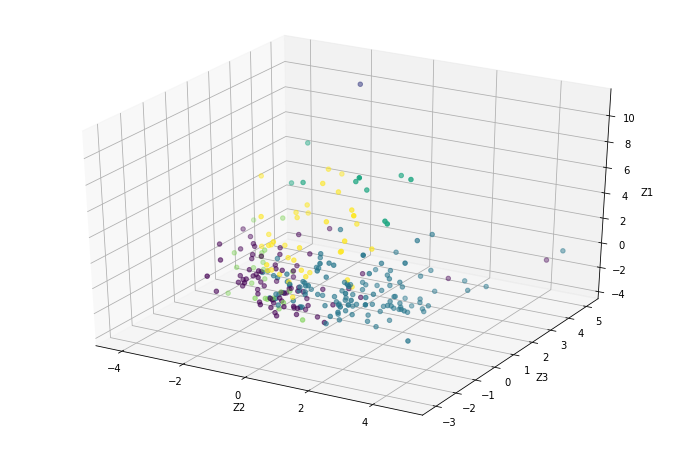

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['z2'], pca_df['z3'], pca_df['z1'], c= characteristics_im['km_trimmed_label'])
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.set_zlabel('Z1')

plt.show()

In [44]:
kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(low_corr_df)

KMeans(n_clusters=6)

In [45]:
pd.Series(kmeans3.labels_).value_counts()

3    81
1    67
0    67
5    38
2    14
4     4
dtype: int64

In [46]:
characteristics_im['km_s_label'] = kmeans3.labels_

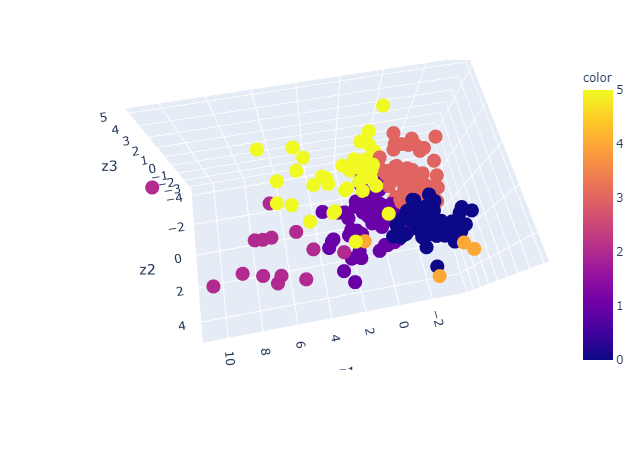

In [47]:
# interactive model

px.scatter_3d(pca_df, 'z1', 'z2', 'z3', color=characteristics_im['km_s_label'])

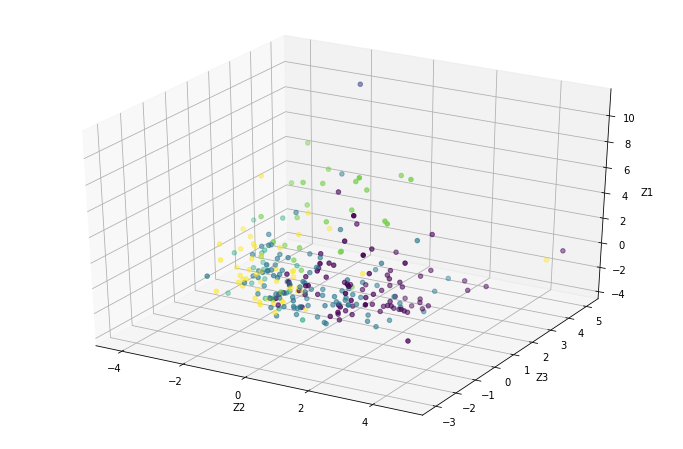

In [48]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['z2'], pca_df['z3'], pca_df['z1'], c= characteristics_im['km_s_label'])
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.set_zlabel('Z1')

plt.show()

This reclustering with the downselected features and then the scaling appears to be _way_ clearer than the first labeling. I'm very happy with the division in either km_trimmed or km_s, for slightly different reasons. I am going to look at hierarchial clustering as well for a comparison. However, I'm only going to look at the trimmed data as the full dataset seems a bit muddy.

## Hierarchial

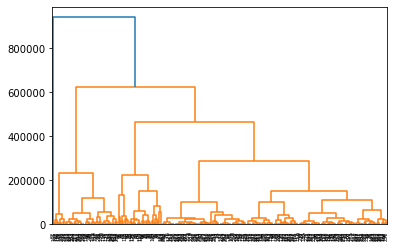

In [55]:
# NOT SCALED

dendrogram = sch.dendrogram(sch.linkage(characteristics_im[cols_to_include], method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
characteristics_im['hc_label'] = hc.fit_predict(characteristics_im[cols_to_include])

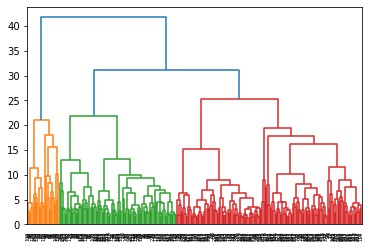

In [56]:
# SCALED

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(low_corr_df, method='ward'))
# create clusters
hc_s = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
characteristics_im['hc_s_label'] = hc_s.fit_predict(low_corr_df)

In [57]:
characteristics_im['hc_label'].value_counts()

0    183
2     52
1     35
3      1
Name: hc_label, dtype: int64

In [58]:
characteristics_im['hc_s_label'].value_counts()

0    95
2    81
3    69
1    26
Name: hc_s_label, dtype: int64

In the non-scaled dendrograms, it appears that 5 clusters is a good cut-off in the distances of points, as there's a natural sort of separation there. The scaled data doesn't have as clear of a separation where the cut-off would be required for n=5 but does around n = 4. Hence, I've picked 4 clusters. The resulting count for the scaled data has a more even spread than the non-scaled data. Let's look at how they map onto the 3D scatter plot using the PCA components as axis.

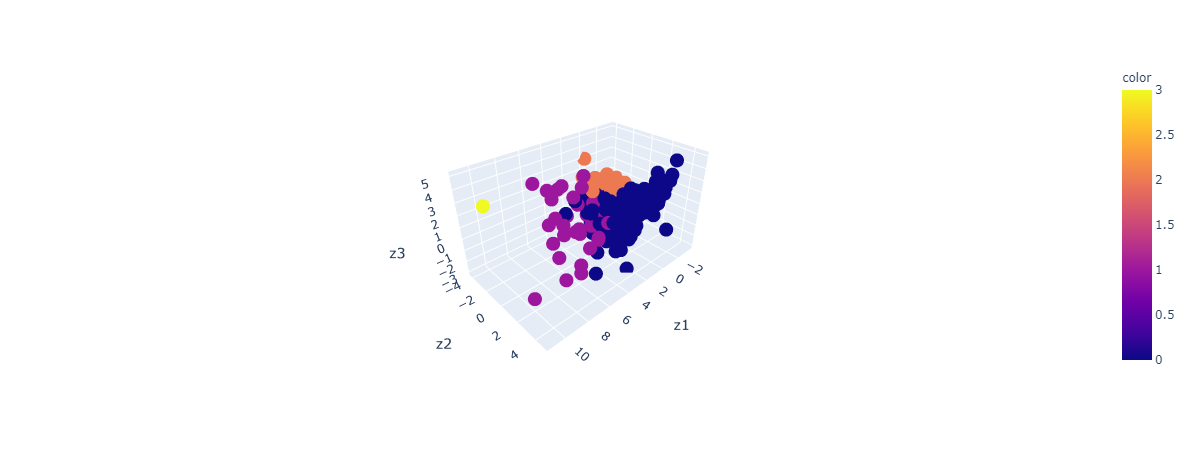

In [79]:
# interactive model

px.scatter_3d(pca_df, 'z1', 'z2', 'z3', color=characteristics_im['hc_label'])

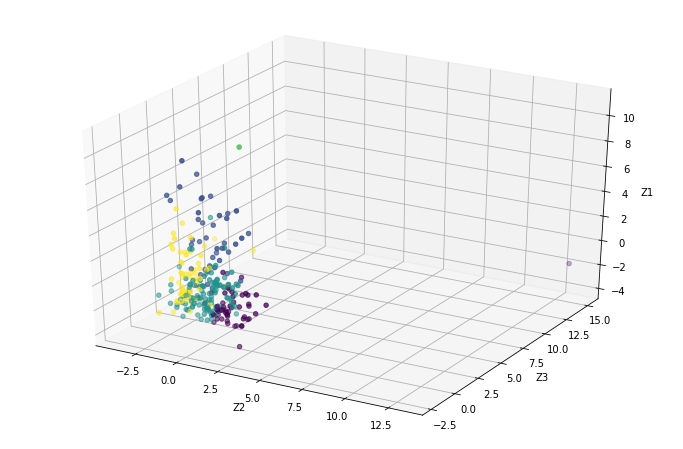

In [126]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['z2'], pca_df['z3'], pca_df['z1'], c= characteristics_im['hc_label'])
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.set_zlabel('Z1')

plt.show()

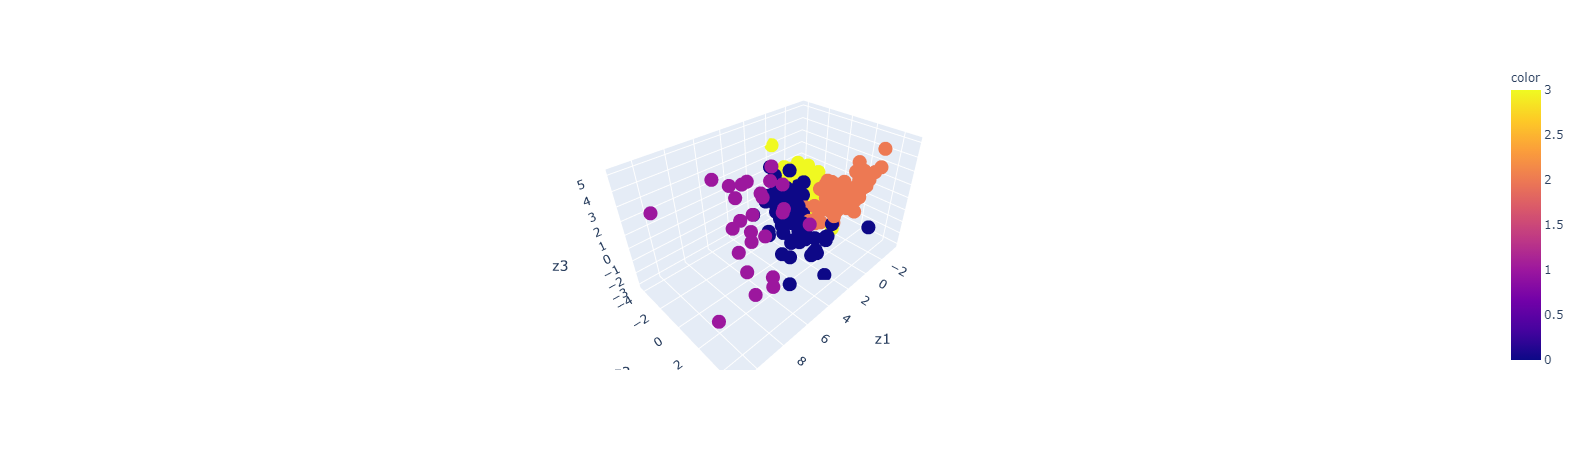

In [60]:
# interactive model

px.scatter_3d(pca_df, 'z1', 'z2', 'z3', color=characteristics_im['hc_s_label'])

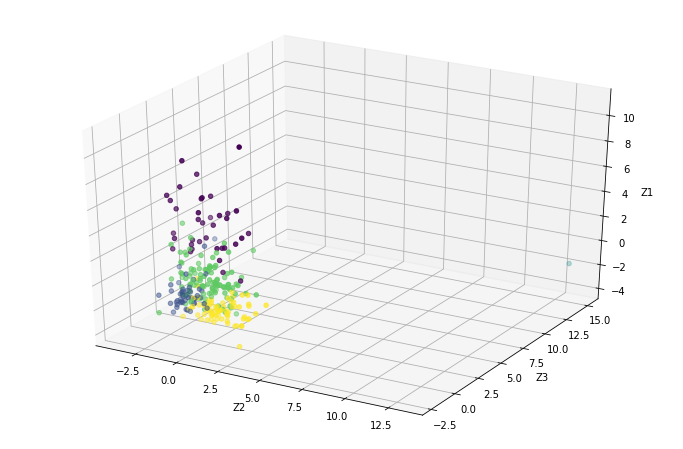

In [128]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['z2'], pca_df['z3'], pca_df['z1'], c= characteristics_im['hc_s_label'])
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.set_zlabel('Z1')

plt.show()

I think I like the hierarchial clustering without scaling better as it did create a separate category for that one very distant point (which I believe is Boston). This more nearly matches the result of the kmeans clustering. I do think that the heirarchial clustering without scaled data produced clusters with a more defined boundary than the kmeans clustering did with un-scaled data. It even picked up on some trends on the z2-z3 plane that kmeans did not. however, these two algorithms used different n's for clustering.

Since I like the unscaled data the best, I'm going to run another hierarchial clustering with n = 5, since that cut-off point looked best. 

Then, since I'm using hierarchial cluster with n = 4 and n = 5, I'm going to re-do my kmeans clustering to use these numbers of clusters for better cross comparison.

In [63]:
# NOT SCALED

# create clusters
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
characteristics_im['hc_n5_label'] = hc2.fit_predict(characteristics_im[cols_to_include])

In [67]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(characteristics_im[cols_to_include])
characteristics_im['km_n4_label'] = kmeans4.labels_

In [68]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(characteristics_im[cols_to_include])
characteristics_im['km_n5_label'] = kmeans5.labels_

In [76]:
pair_list = cols_to_include
pair_list.append('hc_s_label')

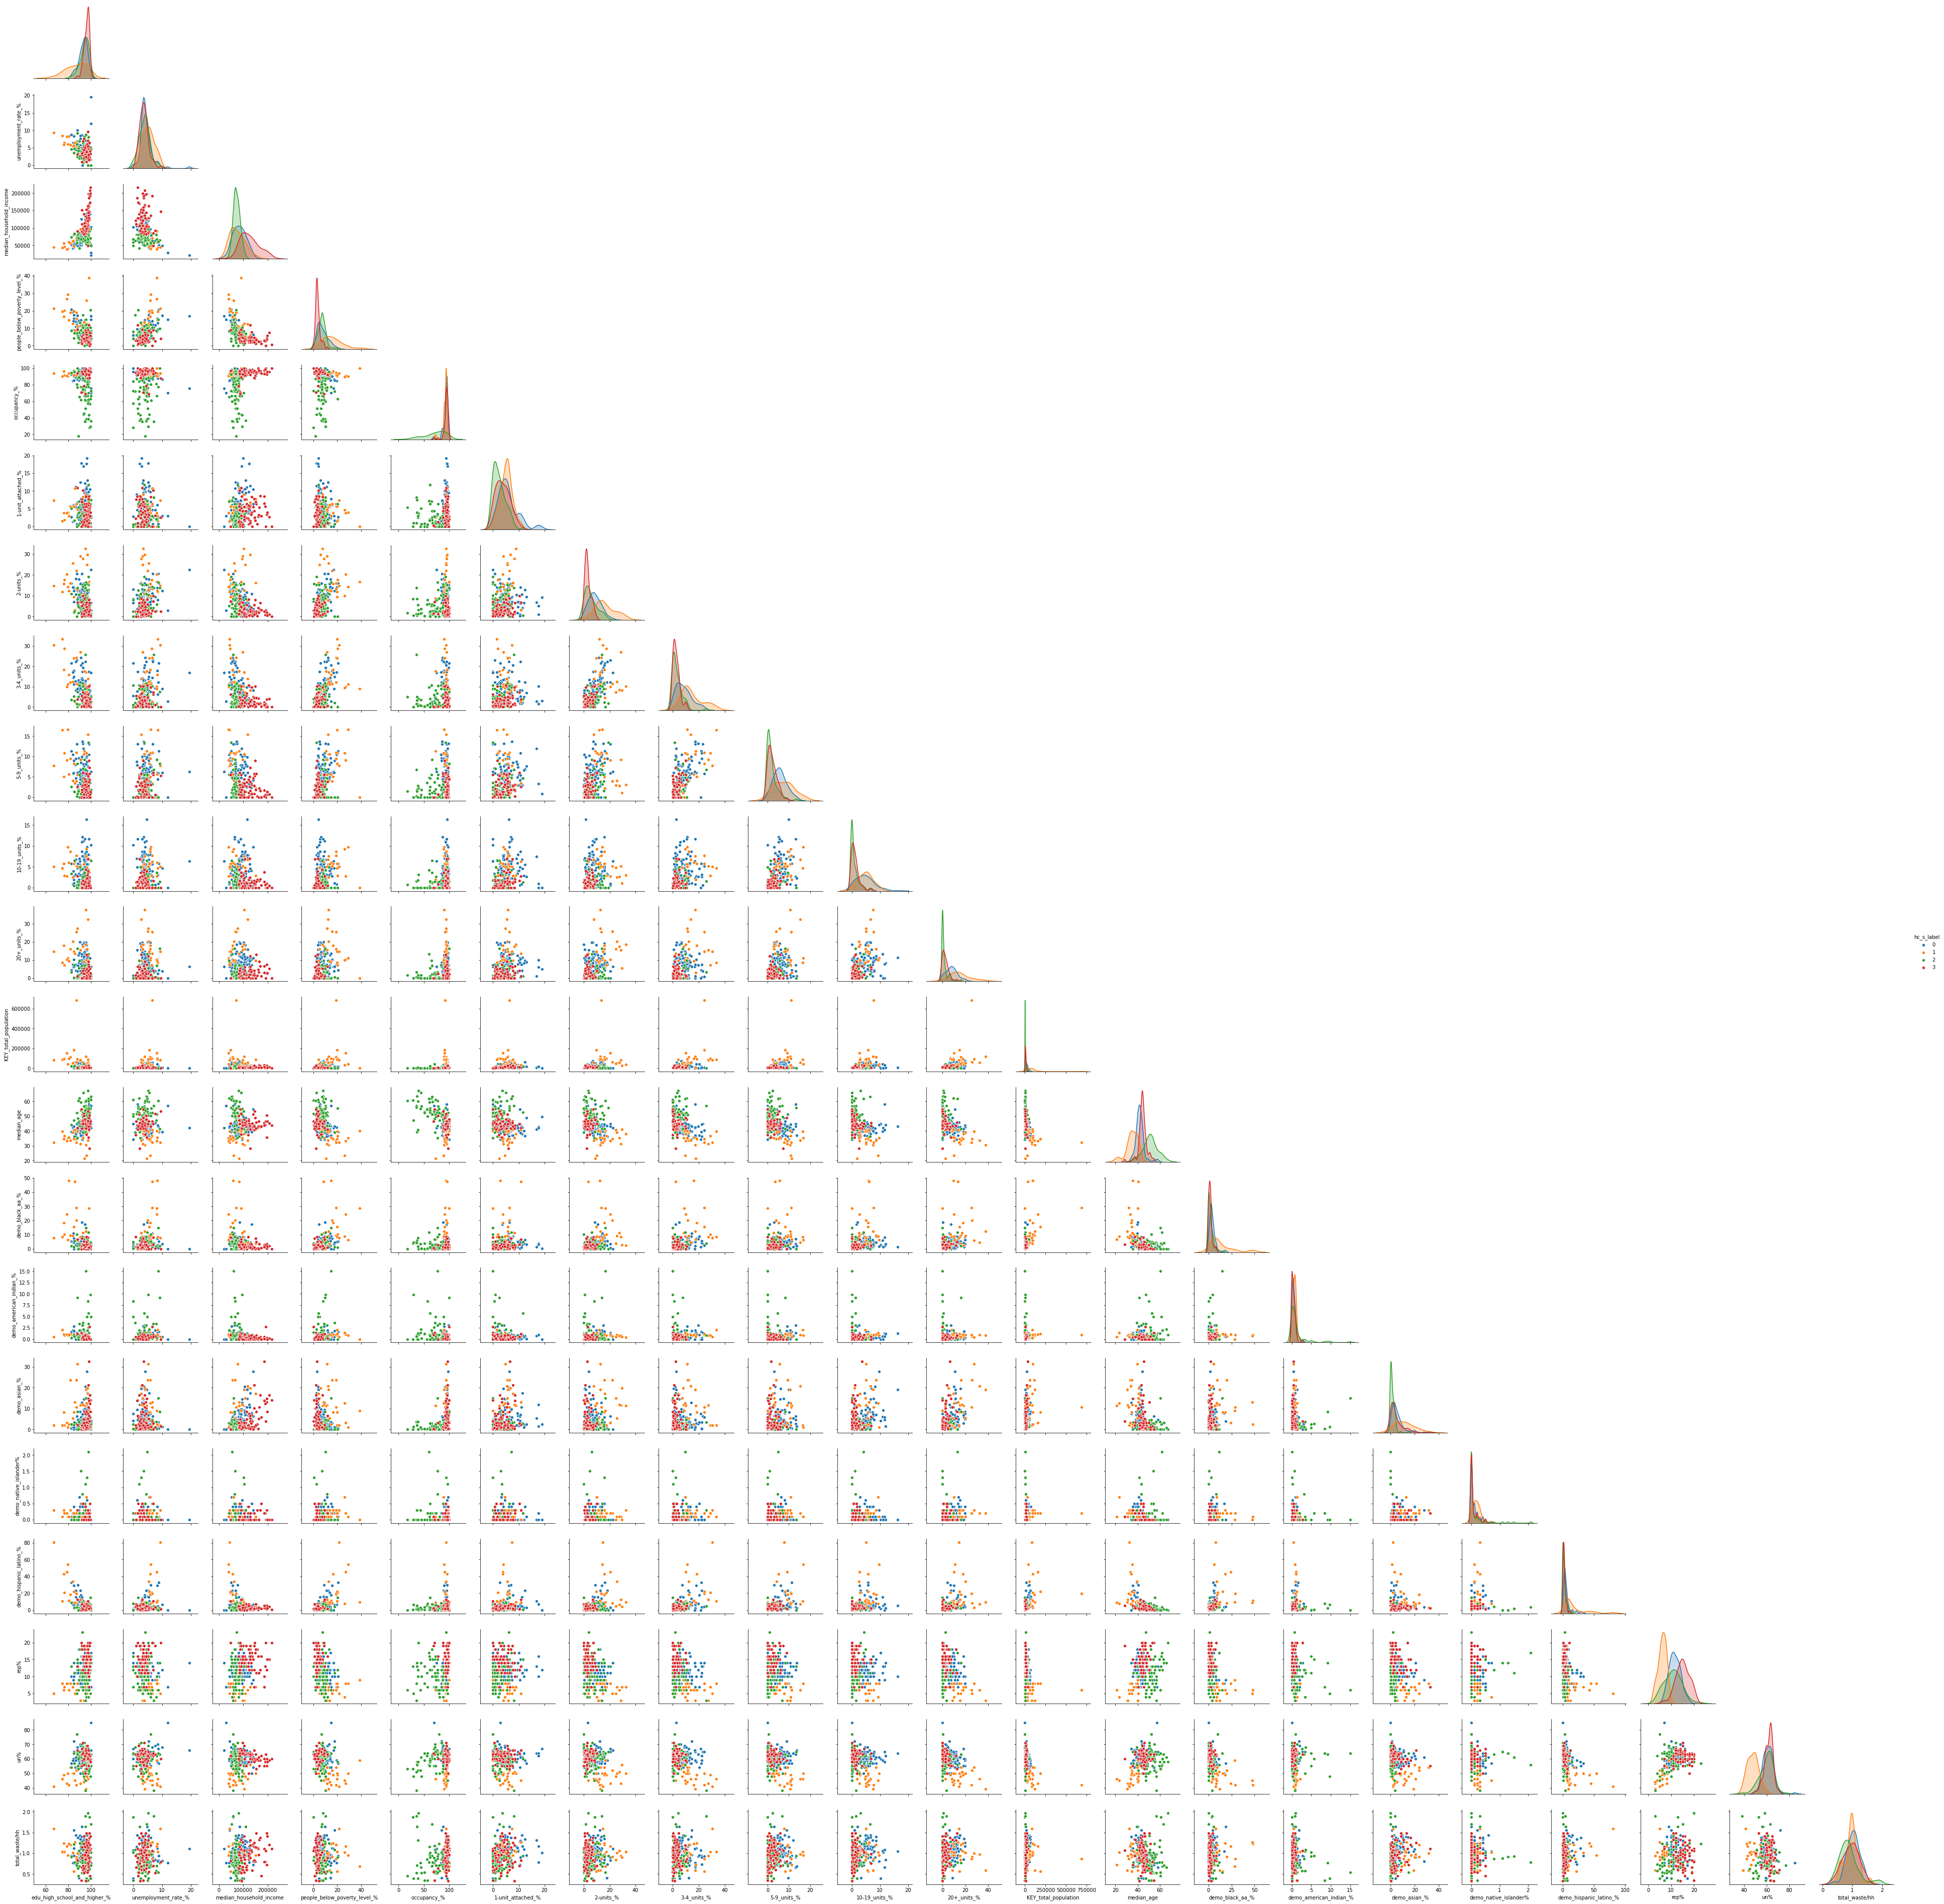

In [77]:
sns.pairplot(data =characteristics_im.loc[:,pair_list], hue = 'hc_s_label', corner = True)

## Next steps:

* check the statistical differences of these clusters against the population data
* explore the regression trends within the selected clustering schema of choice (I'd pick one or two schemes at most, even if multiple look good).

In [78]:
# For saving files
# characteristics_im.to_csv('data/cluster_data.csv', index=True)